## Imports

In [1]:
import math
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Data Preprocessing

In [2]:
%%time
df = pd.read_csv('data/yesbank_data.csv', index_col=0, parse_dates=True)

CPU times: user 22.7 ms, sys: 1.42 ms, total: 24.1 ms
Wall time: 23.6 ms


In [3]:
df.rename(columns={'close': 'c', 'open':'o', 'high':'h', 'low':'l', 'volume':'v'}, inplace=True)

In [4]:
df.head()

,h,l,o,c,v
date,,,,,
2016-01-01 00:00:00+05:30,147.10,144.55,145.53,146.49,4988895
2016-01-04 00:00:00+05:30,145.98,140.22,145.98,141.15,12693585
2016-01-05 00:00:00+05:30,142.62,139.68,141.80,141.54,10345630
2016-01-06 00:00:00+05:30,143.38,140.30,142.39,140.77,8329590
2016-01-07 00:00:00+05:30,138.58,135.14,138.58,135.77,12052960


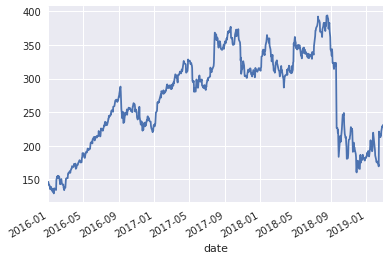

In [5]:
df['c'].plot()

## Implementing a simple crossover strategy

In [6]:
df['r'] = np.log(df['c'] / df['c'].shift(1))
df['sma1'] = df['c'].rolling(15).mean()
df['sma2'] = df['c'].rolling(30).mean()
df['sma3'] = df['c'].rolling(60).mean()

In [7]:
df.dropna(inplace=True)

In [8]:
df['market_dir'] = np.where(df['r'] > 0, 1, -1)

In [9]:
df['strat_dir'] = np.where(df['sma1'] > df['sma3'], 1, -1)

In [10]:
df.head(10)

,h,l,o,c,v,r,sma1,sma2,sma3,market_dir,strat_dir
date,,,,,,,,,,,
2016-03-30 00:00:00+05:30,174.00,169.71,170.70,173.26,13545105,0.023298,163.220000,153.353667,147.511167,1,1
2016-03-31 00:00:00+05:30,175.00,171.71,172.50,173.01,31232455,-0.001444,164.626667,154.098000,147.953167,-1,1
2016-04-01 00:00:00+05:30,173.10,170.48,172.60,171.12,14136725,-0.010984,165.493333,154.909667,148.452667,-1,1
2016-04-04 00:00:00+05:30,173.98,171.00,171.18,173.59,16196910,0.014331,166.514000,155.893667,148.986833,1,1
2016-04-05 00:00:00+05:30,173.02,165.30,172.00,165.84,22500685,-0.045673,166.895333,156.660000,149.404667,-1,1
2016-04-06 00:00:00+05:30,168.43,165.65,167.00,166.81,16484090,0.005832,167.322667,157.470000,149.922000,1,1
2016-04-07 00:00:00+05:30,168.80,166.20,167.79,167.10,9215225,0.001737,167.650000,158.288333,150.394667,1,1
2016-04-08 00:00:00+05:30,170.70,166.64,167.40,169.88,11833340,0.016500,168.250000,159.375333,150.911000,1,1
2016-04-11 00:00:00+05:30,172.49,169.57,170.60,171.93,9609845,0.011995,169.051333,160.502000,151.533333,1,1


In [11]:
df['strat_dir'].diff().value_counts()

 0.0    710
 2.0      7
-2.0      7
Name: strat_dir, dtype: int64

In [12]:
df['s'] = df['strat_dir'] * df['r']

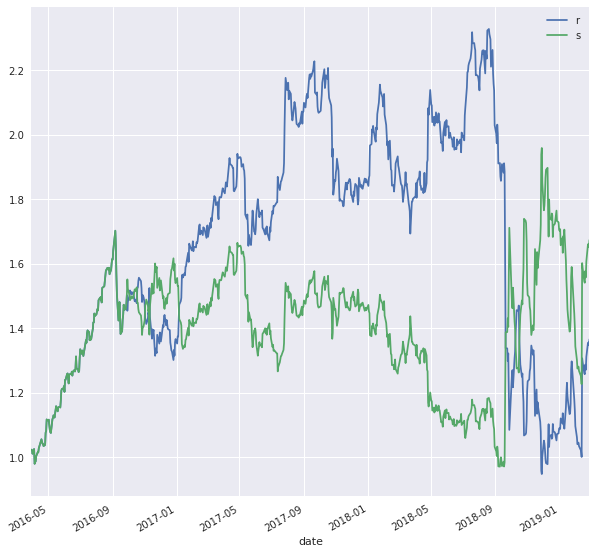

In [13]:
df[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 10));

## Add a machine learning model and perform accuracy testing

## Add a flavour of nlp and use sentiment score for prediction